## IN3050/IN4050 Mandatory Assignment 2: Supervised Learning

**Name: Danielius Kocan (danielik)** 

### Rules

Before you begin the exercise, review the rules at this website: https://www.uio.no/english/studies/examinations/compulsory-activities/mn-ifi-mandatory.html , in particular the paragraph on cooperation. This is an individual assignment. You are not allowed to deliver together or copy/share source-code/answers with others. Read also the "Routines for handling suspicion of cheating and attempted cheating at the University of Oslo" https://www.uio.no/english/about/regulations/studies/studies-examinations/routines-cheating.html By submitting this assignment, you confirm that you are familiar with the rules and the consequences of breaking them.

### Delivery

**Deadline**: Friday, March 19, 2021, 23:59

Your submission should be delivered in Devilry. You may redeliver in Devilry before the deadline, but include all files in the last delivery, as only the last delivery will be read. You are recommended to upload preliminary versions hours (or days) before the final deadline.

### What to deliver?

You are recommended to solve the exercise in a Jupyter notebook, but you might solve it in a Python program if you prefer.

If you choose Jupyter, you should deliver the notebook. You should answer all questions and explain what you are doing in Markdown. Still, the code should be properly commented. The notebook should contain results of your runs. In addition, you should make a pdf of your solution which shows the results of the runs.

If you prefer not to use notebooks, you should deliver the code, your run results, and a pdf-report where you answer all the questions and explain your work.

Your report/notebook should contain your name and username.

Deliver one single zipped folder (.zip, .tgz or .tar.gz) which contains your complete solution.

Important: if you weren’t able to finish the assignment, use the PDF report/Markdown to elaborate on what you’ve tried and what problems you encountered. Students who have made an effort and attempted all parts of the assignment will get a second chance even if they fail initially. This exercise will be graded PASS/FAIL.


### Goals of the exercise
This exercise has three parts. The goal of the first part is to get more experience with supervised classification. We will use simple synthetic datasets and focus on the learning algorithms. 

The goal of the second part is to consider the implementaion of the  Multi-layer feed forward neural network, often called Multi-layer perceptron (MLP).

The third part, which is the smallest one, is dedicated to evaluation.

### Tools
The aim of the exercises is to give you a look inside the learning algorithms. You may freely use code from the weekly exercises and the published solutions. You should not use ML libraries like scikit-learn or tensorflow.

You may use tools like NumPy and Pandas, which are not specific ML-tools.

### Beware
There might occur typos or ambiguities. If anything is unclear, do not hesitate to ask. Also, if you think some assumptions are missing, make your own and explain them!

### Initialization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
import random

# Part 1: Comparing classifiers
## Datasets
We start by making a synthetic dataset of 1600 datapoints and three classes, with 800 individuals in one class and 400 in each of the two other classes. (See https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs regarding how the data are generated.)

When we are doing experiments in supervised learning, and the data are not already split into training and test sets, we should start by splitting the data. Sometimes there are natural ways to split the data, say training on data from one year and testing on data from a later year, but if that is not the case, we should shuffle the data randomly before splitting. (OK, that is not necessary with this particular synthetic data set, since it is already shuffled by default by scikit, but that will not be the case with real-world data.) We should split the data so that we keep the alignment between X and t, which may be achieved by shuffling the indices. We split into 50% for training, 25% for validation, and 25% for final testing. The set for final testing *must not be used* till the end of the assignment in part 3.

We fix the seed both for data set generation and for shuffling, so that we work on the same datasets when we rerun the experiments.

In [2]:
from sklearn.datasets import make_blobs
X, t = make_blobs(n_samples=[400,800,400], centers=[[0,0],[1,2],[2,3]], 
                  n_features=2, random_state=2019)

In [3]:
indices = np.arange(X.shape[0])
random.seed(2020)
random.shuffle(indices)
indices[:10]

array([1301,  293,  968,  624,  658,  574,  433,  368,  512,  353])

In [4]:
X_train = X[indices[:800],:]
X_val = X[indices[800:1200],:]
X_test = X[indices[1200:],:]
t_train = t[indices[:800]]
t_val = t[indices[800:1200]]
t_test = t[indices[1200:]]

Next, we will  make a second dataset by merging the two smaller classes in (X,t) and call the new set (X, t2). This will be a binary set.

In [5]:
t2_train = t_train == 1
t2_train = t2_train.astype('int')
t2_val = (t_val == 1).astype('int')
t2_test = (t_test == 1).astype('int')

Plot the two training sets.

In [6]:
# from weekly task solution
def show(X, y, marker='.'):
    """
    With set X and labels y, plots the points with a different colors for each class on the plot. 
    
    Args:
        X(numpy ndarray): Set, where each index is the position on the plot
        y(numpy array):   Lable for each instance in X
    """
    plt.figure() # to make it plot on new figure
    labels = set(y)
    cl = {lab : [] for lab in labels}
    # cl[lab] shall contain the datapoints labeled lab
    for (a, b) in zip(X, y):
        cl[b].append(a)
    for lab in labels:
        plt.plot([a[0] for a in cl[lab]], [a[1] for a in cl[lab]], 
                 marker, label="class {}".format(lab))
    plt.legend()

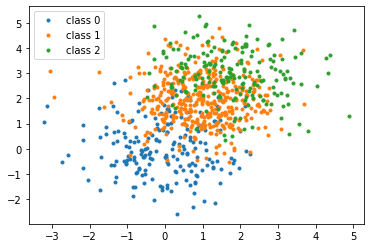

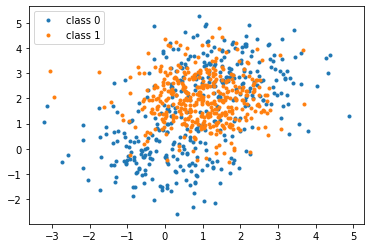

In [7]:
show(X_train, t_train)
show(X_train, t2_train)

## Binary classifiers

### Linear regression
We see that that set (X, t2) is far from linearly separable, and we will explore how various classifiers are able to handle this. We start with linear regression. You may use the implementation from exercise set week07 or make your own. You should make one improvement. The implementation week07 runs for a set number of epochs. You provide the number of epochs with a parameter to the fit-method. However, you do not know what a reasonable number of epochs is. Add one more argument to the fit-method *diff* (with defualt value e.g. 0.001). The training should stop when the update is less than *diff*. The *diff* will save training time, but it may also be wise to not set it too small -- and not run training for too long -- to avoid overfitting.

Train the classifier on (X_train, t2_train) and test for accuracy on (X_val, t2_val) for various values of *diff*. Choose what you think is optimal *diff*. Report accuracy and save it for later.

In [8]:
def mse(y, y_pred):
    """
    Calculates mean square error
    
    Args:
        y(numpy ndarray):          Set, where each index is the position on the plot
        y_pred(numpy array):       Lable for each instance in X
    Returns:
        mean_squared_error(float): Mean square error
    """
    sum_errors = 0.
    for i in range(0,len(y)):
        sum_errors += (y[i] - y_pred[i])**2
    mean_squared_error = sum_errors/len(y)
    return mean_squared_error

In [9]:
def add_bias(X):
    """
    Adds a bias in index 0 in X ndarray.
    
    Args:
        X(numpy ndarray): Ndarray that we will add bias to
    Returns:
        _(numpy ndarray): Array with the added bias
    """
    # Put bias in position 0
    sh = X.shape
    if len(sh) == 1:
        #X is a vector
        return np.concatenate([np.array([1]), X])
    else:
        # X is a matrix
        m = sh[0]
        bias = np.ones((m,1)) # Makes a m*1 matrix of 1-s
        return np.concatenate([bias, X], axis  = 1) 

In [10]:
class NumpyClassifier():
    """Common methods to all numpy classifiers --- if any"""
    
    def accuracy(self,X_test, y_test, **kwargs):
        pred = self.predict(X_test, **kwargs)
        if len(pred.shape) > 1:
            pred = pred[:,0]
        return sum(pred==y_test)/len(pred)

In [11]:
# Implementation from week 7 tasks
class NumpyLinRegClass(NumpyClassifier):

    def fit(self, X_train, t_train, eta = 0.1, diff=0.001):
        """X_train is a Nxm matrix, N data points, m features
        t_train are the targets values for training data"""
        
        (k, m) = X_train.shape
        X_train = add_bias(X_train)
        self.weights = weights = np.zeros(m+1)
        curDiff = 1
        
        while curDiff > diff:
            oldError = mse(t_train, X_train @ weights)
            weights -= eta / k *  X_train.T @ (X_train @ weights - t_train)      
            newError = mse(t_train, X_train @ weights)
            curDiff = oldError - newError
            
            
    def predict(self, x, threshold=0.5):
        """Predict the value for the item x"""
        z = add_bias(x)
        score = z @ self.weights
        return score>threshold

In [12]:
lin_cl = NumpyLinRegClass()
lin_cl.fit(X_train, t2_train, 0.1, 0.000001)
lin_cl.accuracy(X_val, t2_val)

0.6

### Logistic regression
Do the same for logistic regression, i.e., add the *diff*, tune it, report accuracy, and store it for later.

In [13]:
def logistic(x):
    return 1/(1+np.exp(-x))

# Implementation from week 7 tasks
class NumpyLogReg(NumpyClassifier):

    def fit(self, X_train, t_train, eta = 0.1, diff=0.001):
        """X_train is a Nxm matrix, N data points, m features
        t_train are the targets values for training data"""
        
        (k, m) = X_train.shape
        X_train = add_bias(X_train)
        
        self.weights = weights = np.zeros(m+1)
        curDiff = 1
        
        while curDiff > diff:
            oldError = mse(t_train, X_train @ weights)
            weights -= eta / k *  X_train.T @ (self.forward(X_train) - t_train)     
            newError = mse(t_train, X_train @ weights)
            curDiff = oldError - newError      
    
    def forward(self, X):
        return logistic(X @ self.weights)
    
    def score(self, x):
        z = add_bias(x)
        score = self.forward(z)
        return score
    
    def predict(self, x, threshold=0.5):
        """Predict the value for the item x"""
        z = add_bias(x)
        score = self.forward(z)
        return (score>threshold).astype('int')

In [14]:
lr_cl = NumpyLogReg()
lr_cl.fit(X_train, t2_train, 0.1, 0.001)
lr_cl.accuracy(X_val, t2_val)

0.6

### *k*-nearest neighbors (*k*NN)
We will now compare to the *k*-nearest neighbors classifier. You may use the implementation from the week05 exercise set. Beware, though, that we represented the data differently from what we do here, using Python lists instead of numpy arrays. You might have to either modify the representation of the data or the code a little.

Train on (X_train, t2_train) and test on (X2_val, t2_val) for various values of *k*. Choose the best *k*, report accuracy and store for later.

In [15]:
from collections import Counter

def distance_L2(a, b):
    "L2-distance using comprehension"
    s = sum((x - y) ** 2 for (x,y) in zip(a,b))
    return s ** 0.5

def majority(a):
    counts = Counter(a)
    return counts.most_common()[0][0]

In [16]:
# Implementation from week 5 task
class PyClassifier():
    """Common methods to all python classifiers --- if any"""
    
    def accuracy(self,X_test, y_test, **kwargs):
        """Calculate the accuracy of the classifier 
        using the predict method"""
        predicted = [self.predict(a, **kwargs) for a in X_test]
        equal = len([(p, g) for (p,g) in zip(predicted, y_test) if p==g])
        return equal / len(y_test)


In [17]:
class PykNNClassifier(PyClassifier):
    """kNN classifier using pure python representations"""
    
    def __init__(self, k=3, dist=distance_L2):
        self.k = k
        self.dist = dist
        
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    
    def predict(self, a):
        """Predict the value for the item x"""
        X = self.X_train
        y = self.y_train
        distances = [(self.dist(a, b), b, c) for (b, c) in zip(X, y)]
        distances.sort()
        predictors = [c for (_,_,c) in distances[0: self.k]]
        return majority(predictors)

In [18]:
bestAcc = 0
k = 0
for i in range(1, 20):
    cls = PykNNClassifier(k=i)
    cls.fit(X_train.tolist(), t2_train.tolist())
    acc = cls.accuracy(X_val.tolist(), t2_val.tolist())
    if acc > bestAcc:
        bestAcc = acc 
        k = i

print(f"Best kNN accuracy: {bestAcc} is for k = {k}. (Range: 1 to 20)")

Best kNN accuracy: 0.7675 is for k = 14. (Range: 1 to 20)


### Simple perceptron
Finally, run the simple perceptron (week06) on the same set, and report and store accuracy.

In [19]:
class PyPerClassifier(PyClassifier):
    """Simple perceptron python classifier"""
    
    def fit(self, X_train, y_train, eta=1, epochs=1):
        """Train the self.weights on the training data with learning
        rate eta, running epochs many epochs"""
        X_train = [[1]+list(x) for x in X_train] # Put bias in position 0      
        self.dim = dim = len(X_train[0])
        self.weights = weights = [0 for _ in range(dim)]
        # Initialize all weights to 0.
        for e in range(epochs):
            for x, t in zip(X_train, y_train):
                y = int(self.forward(x)>0)
                for i in range(dim):
                    weights[i] -= eta * (y - t) * x[i]
        
    def forward(self, x):
        """Calculate the score for the item x"""
        score = sum([self.weights[i]*x[i] for i in range(self.dim)])
        return score       
    
    def predict(self, x):
        """Predict the value for the item x"""
        x = [1] + list(x)
        score = self.forward(x)
        return int(score > 0)

In [20]:
bestAcc = 0
epoch = 0
for i in range(1,25):
    cl = PyPerClassifier()
    cl.fit(X_train.tolist(), t2_train.tolist(), eta= 0.1, epochs = i)
    acc = cl.accuracy(X_val.tolist(), t2_val.tolist())
    if acc > bestAcc:
        bestAcc = acc
        epoch = i
        
print(f"Best perceptron accuracy: {bestAcc} is after {epoch} epoch. (Range: 1 to 25)")

Best perceptron accuracy: 0.6625 is after 17 epoch. (Range: 1 to 25)


### Summary
Report the accuracies for the four classifiers in a table.

Write a couple of sentences where you comment on what you see. Are the results as you expected?

| Classifier | Accuracy |
| --- | --- |
| Linear regression | 0.6 |
| Logistic regression | 0.6 |
| kNN | 0.7675 |
| Simple perceptron | 0.6625 |

Looks like best accuracy is for k-nearest neighbors. It is actually what I expected. 

I didn't had any hope for linear regression and logistic regression, because from the plot above it is easy to see that data is not well suitable for linear/logistic classifiers. Moreover we had to classes in test2, and they didn't had good separation, so it is hard to find a good position for line.

I was also expecting that Simple perceptron will be very close to the Linear/Logistic regression, because simple perceptron is a type of linear classifier. However it does not look that that. The result for Simple perceptron is better than for logistic/linear regression. So this is kind of weird for me.

## Multi-class classifiers
We turn to the task of classifying when there are more than two classes, and the task is to ascribe one class to each input. We will now use the set (X, t).

### *k*NN
One of the classifiers can handle multiple classes without modifications: the *k*-nearest neighbors classifier. Train it on (X_train, t_train), test it on (X_val, t_val) for various values of *k*. Choose the one you find best and report the accuracy.

In [21]:
bestAcc = 0
k = 0
for i in range(1, 20):
    cls = PykNNClassifier(k=i)
    cls.fit(X_train.tolist(), t_train.tolist())
    acc = cls.accuracy(X_val.tolist(), t_val.tolist())
    if acc > bestAcc:
        bestAcc = acc 
        k = i

print(f"Best kNN accuracy: {bestAcc} is for k = {k}. (Range: 1 to 20)")

Best kNN accuracy: 0.77 is for k = 14. (Range: 1 to 20)


### Logistic regression "one-vs-rest"
We saw in the lecture how a logistic regression classifier can be turned into a multi-class classifier using the one-vs-rest approach. We train one classifier for each class and assign the class which ascribes the highest probability.

Extend the logisitc regression classifier to a multi-class classifier. To do this, you must modify the target values from scalars to arrays. Train the resulting classifier on (X_train, t_train), test it on (X_val, t_val), and report the accuracy.

--------------------------------------------

To make it work, I need, for each class, make other classes as the same class. So if we have 3 classes. First trained classifier will be for class 1 while class 2 and 3 is the same class (so it is like to have 2 classes). Second trained classifier will be for class 2 while class 1 and 3 is the same class. Last trained classifier will be class 3 while class 1 and 2 is the same class.

In [22]:
# We have data with 3 classes for train and valuation:
# X_train, X_val.
# t_train, t_val.
# show(X_train, t_train)

all_acc = []
for i in set(t_train): # so it can work for any number of classes, not only 3.
    lr_cl = NumpyLogReg()
    # This part of the code is from the given precode in this assignment.
    tnew_train = (t_train == i).astype('int')
    tnew_val = (t_val == i).astype('int')
    #show(X_train, tnew_train) # for testing
    lr_cl.fit(X_train, tnew_train, 0.1, 0.001)
    acc = lr_cl.accuracy(X_val, tnew_val)
    all_acc.append(acc)

    print(f"Class {i} accuracy: {acc}")
    
print(f"Avarage accuracy for Logistic Regression: {sum(all_acc)/len(all_acc)}")

Class 0 accuracy: 0.81
Class 1 accuracy: 0.6
Class 2 accuracy: 0.7425
Avarage accuracy for Logistic Regression: 0.7175000000000001


Discuss the results in a couple of sentences, addressing questions like

- How do the two classfiers compare?
- How do the results on the three-class classification task compare to the results on the binary task?
- What do you think are the reasons for the differences?

    - kNN had better accuracy, with 0.05 more than Logistic regression. I think reason for that is that for some classes accuracy is worse than for others, as we can see from the results (Class 1 acc: 0.6, however class 0 acc: 0.81). This is because data for class 1 is located in between class 0 and class 2.
    - kNN had a little better accuracy with three-class classification, than with binary. However I can say that both are almost equal. Moreover logistic regression did a bit better too (If I calculated total accuracy right). Because One-vs-Rest is like a binary classifier but multiple times.
    - I think the reason for that kNN have almost identical accuracy is that it is good suited for any number of classes. Because we use the same method for any number of classes. But for One-vs-Rest we will get sometimes bad accuracy for some classes, and maybe better accuracy for some other classes. The position of "main" class and all other classes can play a big role in that.
    
    

## Adding non-linear features

We are returning to the binary classifier and the set (X, t2). As we see, some of the classifiers are not doing too well on the (X, t2) set. It is easy to see from the plot that this data set is not well suited for linear classifiers. There are several possible options for trying to learn on such a set. One is to construct new features from the original features to get better discriminants. This works e.g., for the XOR-problem. The current classifiers use two features: $x_1$ and $x_2$ (and a bias term $x_0$). Try to add three additional features of the form ${x_1}^2$, ${x_2}^2$, $x_1*x_2$ to the original features and see what the accuracies are now. Compare to the results for the original features in a 4x2 table.



In [23]:
def addNewFeatures(ndarr):
    """Adds new features"""
    
    x1_sq = ndarr[:,0]**2
    x2_sq = ndarr[:,1]**2
    x1x2 = np.multiply(x1_sq,x2_sq)
    
    x1_sq = x1_sq.reshape(x1_sq.shape + (1,))
    x2_sq = x2_sq.reshape(x2_sq.shape + (1,))
    x1x2 = x1x2.reshape(x1x2.shape + (1,))
    
    ret_arr = ndarr
    ret_arr = np.append(ret_arr, x1_sq, axis=1)
    ret_arr = np.append(ret_arr, x2_sq, axis=1)
    ret_arr = np.append(ret_arr, x1x2, axis=1)
    
    return ret_arr
    

# Creating new datasets by adding new features
Xnew_train = addNewFeatures(X_train)
Xnew_val = addNewFeatures(X_val)

# Linear regression
lin_cl = NumpyLinRegClass()
lin_cl.fit(Xnew_train, t2_train, 0.001, 0.00001) # changed learning rate
print(f"Linear regression: {lin_cl.accuracy(Xnew_val, t2_val)}")

# Logistic regression
lr_cl = NumpyLogReg()
lr_cl.fit(Xnew_train, t2_train, 0.1, 0.1)
print(f"Logistic regression: {lr_cl.accuracy(Xnew_val, t2_val)}")

# kNN
bestAcc = 0
k = 0
for i in range(1, 20):
    cls = PykNNClassifier(k=i)
    cls.fit(Xnew_train.tolist(), t2_train.tolist())
    acc = cls.accuracy(Xnew_val.tolist(), t2_val.tolist())
    if acc > bestAcc:
        bestAcc = acc 
        k = i

print(f"Best kNN accuracy: {bestAcc} is for k = {k}. (Range: 1 to 20)")

# Simple perceptron
bestAcc = 0
epoch = 0
for i in range(1,40):
    cl = PyPerClassifier()
    cl.fit(Xnew_train.tolist(), t2_train.tolist(), eta= 0.1, epochs = i)
    acc = cl.accuracy(Xnew_val.tolist(), t2_val.tolist())
    if acc > bestAcc:
        bestAcc = acc
        epoch = i
        
print(f"Best perceptron accuracy: {bestAcc} is after {epoch} epoch. (Range: 1 to 40)")


Linear regression: 0.7325
Logistic regression: 0.52
Best kNN accuracy: 0.7525 is for k = 13. (Range: 1 to 20)
Best perceptron accuracy: 0.6275 is after 38 epoch. (Range: 1 to 40)


| Classifier | Accuracy | Change |
| --- | --- | --- |
| Linear regression | 0.7325 | higher |
| Logistic regression | 0.52 | lower |
| kNN | 0.7525 | lower |
| Simple perceptron | 0.6275 | lower |


Explain in a couple of sentences what effect the non-linear features have on the various classifiers. (By the way, some of the classifiers could probably achieve better results if we scaled the data, but we postpone scaling to part 2 of the assignment.)

---------------------

Linear regression did very well. However I had to change learning rate in linear regression, from 0.1 to 0.001, to make it more accurate. It runs slower but it have more accurate answer. 

All others classifiers lost a bit in accuracy.

# Part II
## Multi-layer neural networks
We will implement the Multi-layer feed forward network (MLP, Marsland sec. 4.2.1). We will do so in two steps. In the first step, we will work concretely with the dataset (X, t). We will initialize the network and run a first round of training, i.e. one pass throught the algorithm at p. 78 in Marsland.

In the second step, we will turn this code into a more general classifier. We can train and test this on (X, t), but also on other datasets.

First of all, you should scale the X.

In [24]:
# Scaling of X_train
# From Normalization and Standarization, I decided to use min-max normalization.
x_max = np.max(X_train)
x_min = np.min(X_train)
X_train_scaled = (X_train - x_min)/(x_max - x_min)
# show(X_train, t_train) # for test
# show(X_train_scaled, t_train) # for test


## Step1: One round of training

### Initialization
We will only use one hidden layer. The number of nodes in the hidden layer will be a hyper-parameter provided by the user; let's call it *dim_hidden*. (*dim_hidden* is called *M* by Marsland.) Initially, we will set it to 6. This is a hyper-parameter where other values may give better results, and the hyper-parameter could be tuned.

Another hyper-parameter set by the user is the learning rate. We set the initial value to 0.01, but also this may need tuning.

In [25]:
eta = 0.01 # Learning rate
dim_hidden = 6

We assume that the input *X_train* (after scaling) is a matrix of dimension *P x dim_in*, where *P* is the number of training instances, and *dim_in* is the number of features in the training instances (*L* in Marsland). Hence we can read *dim_in* off from *X_train*. Similarly, we can read *dim_out* off from *t_train*. Beware that *t_train* must be given the form of *P x dim_out* at some point, cf. the "one-vs-all" exercise above.

In [26]:
dim_in = X_train.shape[1]
dim_out = len(set(t_train))

We need two sets of weights: weights1 between the input and the hidden layer, and weights2, between the hidden layer and the output. Make the weight matrices and initialize them to small random numbers. Make sure that you take the bias terms into consideration and get the correct dimensions.

In [27]:
# We have dim_in = 2 and dim_out = 3, while hidden layer will have 6. 
# So we need to have: 2-> 6 -> 3
weights1 = np.random.rand(dim_in, dim_hidden) # between input and the hidden layer
weights2 = np.random.rand(dim_hidden, dim_out) # between hidden layer and the output

bias1 = np.zeros(dim_hidden)
bias2 = np.zeros(dim_out)

### Forwards phase
We will run the first step in the training, and start with the forward phase. Calculate the activations after the hidden layer and after the output layer. We will follow Marsland and use the logistic (sigmoid) activation function in both layers. Inspect whether the results seem reasonable with respect to format and values.

In [28]:
hidden_activations = logistic((X_train_scaled @ weights1) + bias1)
print(hidden_activations.shape)
print(hidden_activations)

(800, 6)
[[0.66235208 0.62961145 0.64815942 0.6220043  0.66680629 0.53634958]
 [0.69282244 0.64868947 0.68182936 0.64941095 0.70219242 0.54583179]
 [0.61994212 0.58334034 0.61964294 0.5960536  0.63187444 0.53000931]
 ...
 [0.58927487 0.57104889 0.58068259 0.5660514  0.5915198  0.51935766]
 [0.68292139 0.64311328 0.67029578 0.64007013 0.69026475 0.54248465]
 [0.64432604 0.60971846 0.63611708 0.61097583 0.65204923 0.53366625]]


In [29]:
output_activations = logistic((hidden_activations @ weights2) + bias2)
print(output_activations.shape)
print(output_activations)

(800, 3)
[[0.83485071 0.86690096 0.85687126]
 [0.84469035 0.87465429 0.8656377 ]
 [0.82458725 0.85721891 0.84548208]
 ...
 [0.81260125 0.84821643 0.83530578]
 [0.84141552 0.87212028 0.86278884]
 [0.83055888 0.8628501  0.8521123 ]]


### Backwards phase
Calculate the delta terms at the output. We assume, like Marsland, that we use sums of squared errors. (This amounts to the same as using the mean square error).

In [30]:
t_train_new = np.zeros((len(X_train[:,0]), dim_out))
t_train_new[t_train == 0] = [1,0,0]
t_train_new[t_train == 1] = [0,1,0]
t_train_new[t_train == 2] = [0,0,1]
# print(t_train_new[:20])
# print(t_train[:20])

# From formula page 78-79 in Marsland
output_error = (output_activations - t_train_new)*output_activations*(1-output_activations)
# !!! IF (output_activations - t_train_new) so we need to have -= on weigths2 and not +
# However if we have (t_train_new - output_activations) we need to have + on wieghts2 change and not -
# And also results better with same (- or +) on weights1

# output_error = (t_train_new - output_activations)*output_activations*(1-output_activations)


Calculate the delta terms in the hidden layer.

In [31]:
hidden_error = hidden_activations * (1-hidden_activations)*(output_error @ weights2.T)

Update the weights.
Check that they have changed.
As the weights depend on the random initialization, there is no unique correct solution at this point. But you should be able to see that the weights have been updated.

In [32]:
weights1 += eta * (X_train_scaled.T @ hidden_error) # between input and the hidden layer
weights2 -= eta * (hidden_activations.T @ output_error) # between hidden layer and the output

# print(weights1)
# print(weights2)

##  Step 2: A Multi-layer neural network classifier

You want to train and test a classifier on (X, t). You could have put some parts of the code in the last step into a loop and run it through some iterations. But instead of copying code for every network we want to train, we will build a general Multi-layer neural network classfier as a class. This class will have some of the same structure as the classifiers we made for linear and logistic regression. The task consists mainly in copying in parts from what you did in step 1 into the template below. Remember to add the *self*- prefix where needed, and be careful in your use of variable names.

In [33]:
class MNNClassifier():
    """A multi-layer neural network with one hidden layer"""
    
    def __init__(self,eta = 0.001, dim_hidden = 6):
        """Initialize the hyperparameters"""
        self.eta = eta
        self.dim_hidden = dim_hidden

        # Should you put additional code here?
        # Not really, because I can define self. variables in other functions.
        # However by defining it here and puting value to None, I would make it 
        # more safe, i guess
        # In my case If I am not defining any more self. so I need to be careful,
        # because I must not use intanse variables before defining them.
        
    def fit(self, X_train, t_train, epochs = 100):
        """Initialize the weights. Train *epochs* many epochs."""
        
        # Initilaization
        self.dim_in =  X_train.shape[1]
        self.dim_out = len(set(t_train))
        
        # 1/sqrt(dim_in) from Marsland book recommendation
        # between input and the hidden layer
        self.weights1 = np.random.rand(self.dim_in, self.dim_hidden)*(1/np.sqrt(self.dim_in))
        # between hidden layer and the output
        self.weights2 = np.random.rand(self.dim_hidden, self.dim_out)*(1/np.sqrt(self.dim_in))

        self.bias1 = np.zeros(self.dim_hidden)
        self.bias2 = np.zeros(self.dim_out)
        
        t_train_new = np.zeros((X_train.shape[0], self.dim_out))
        if self.dim_out == 2:
            t_train_new[t_train == 0] = [1,0]
            t_train_new[t_train == 1] = [0,1]
        else:
            t_train_new[t_train == 0] = [1,0,0]
            t_train_new[t_train == 1] = [0,1,0]
            t_train_new[t_train == 2] = [0,0,1]
        self.t_train_new = t_train_new
        
        for e in range(epochs):
            # Run one epoch of forward-backward
            self.hidden_activations, self.output_activations = self.forward(X_train)
            self.backward(X_train)

            
    def forward(self, X):
        """Perform one forward step. 
        Return a pair consisting of the outputs of the hidden_layer
        and the outputs on the final layer"""
        hidden_activations = logistic((X @ self.weights1) + self.bias1)
        output_activations = logistic((hidden_activations @ self.weights2) + self.bias2)
        return hidden_activations, output_activations
    
    def backward(self, X):
        output_error = (self.output_activations - self.t_train_new)*self.output_activations*(1-self.output_activations)
        hidden_error = self.hidden_activations * (1-self.hidden_activations)*(output_error @ self.weights2.T)
        
        self.weights1 -= eta * (X.T @ hidden_error) # between input and the hidden layer
        self.weights2 -= eta * (self.hidden_activations.T @ output_error) # between hidden layer and the output
        
        self.bias1 = self.eta * np.sum(hidden_error, axis=0)
        self.bias2 = self.eta * np.sum(output_error, axis=0, keepdims=True)

    def accuracy(self, X_test, y_test, **kwargs):
        """Calculate the accuracy of the classifier on the pair (X_test, t_test)
        Return the accuracy"""
        predicted = [self.predict(a, **kwargs) for a in X_test]
        equal = len([(p, g) for (p, g) in zip(predicted, y_test) if p==g])
        return equal / len(y_test)

    def predict(self, X):
        """Predict the value for the item x"""
        hid, out = self.forward(X)
        return out.argmax()

Train the network on (X_train, t_train) (after scaling), and test on (X_val, t_val). Adjust hyperparameters or number of epochs if you are not content with the result.

In [34]:
# Train
x_max = np.max(X_train)
x_min = np.min(X_train)
X_train_scaled = (X_train - x_min)/(x_max - x_min)

maxList = []
for _ in range(1): # can change range to neede value, to check the max accuracy from many runs
    mnn = MNNClassifier(0.01, 6)
    mnn.fit(X_train_scaled, t_train, 5000)

    # Test
    x_max = np.max(X_val)
    x_min = np.min(X_val)
    X_val_scaled = (X_val - x_min)/(x_max - x_min)
    acc = mnn.accuracy(X_val_scaled, t_val)
    maxList.append(acc)

print(max(maxList))
# Got 0.675 (1000 epochs, 0.01 learning rate)
# Got 0.75  (5000 epochs, 0.01 learning rate)

0.5675


## Make a neural network classifier for (X,t)
Let us see whether a multilayer neural network can learn a non-linear classifier.
Train it on (X_train, t_train) and test it on (X_val, t_val).
Tune the hyper-parameters for the best result.

In [35]:
# Wasn't sure what I had to do. So I just tried to letneural network learn without scaling anything
maxList = []
for _ in range(1):
    mnn = MNNClassifier(0.01, 6)
    mnn.fit(X_train, t_train, 5000)

    maxList.append(mnn.accuracy(X_val, t_val))

print(max(maxList))

# Got 0.7475 (1000 epochs, 0.01 learning rate)
# Got 0.7525 (5000 epochs, 0.01 learning rate)

# Feels like Neural network worsk better without scaling (in avarage). Maybe it is how it is supposed 
# to be or I just did something wrong in scaling

0.74


## For master's students: Early stopping
There is a danger of overfitting if we run too many epochs of training. One way to control that is to use early stopping. We can use (X_val, t_val) as valuation set when training on (X_train, t_train).

Let *e=50* or *e=10* (You may try both or choose some other number) After *e* number of epochs, calculate the loss for both the training set (X_train, t_train) and the validation set (X_val, t_val), and plot them as in figure 4.11 in Marsland. 

Modify the code so that the training stops if the loss on the validation set is not reduced by more than *t* after *e* many epochs, where *t* is a threshold you provide as a parameter. 

# Part III: Final testing
Take the best classifiers that you found for the training sets (X, t) and (X, t2) and test them on (X_test, t_test) and (X_test, t2_test), respectively. Compute accuracy, the confusion matrix, precision and recall. Answer in 2-3 sentences: How do the accuracies compare to the results on the validation sets?

In [39]:
# I think KNN and MNN did very well. Also linear regression did well with extra features.
# However I will only take KNN and MNN

def cf_matrix(actual, predicted):
    K = len(np.unique(actual))
    matrix = np.zeros((K,K))
    for i in range(len(actual)):
        matrix[actual[i], predicted[i]] += 1

    print("         Predicted  ")
    print(f"       {matrix[0]}")
    print(f"Actual {matrix[1]}")
    if len(matrix) > 2:
        print(f"       {matrix[2]}")
    
    return matrix

def precision(matrix):
    """Makes list of the precision values"""
    precList = []
    classIndex = 0
    for x in matrix.T:
        if sum(x) != 0:
            precList.append(x[classIndex]/sum(x))
        else:
            precList.append(float(0))
        classIndex += 1
    return precList

def recall(matrix):
    """Makes list of the recall values"""
    recallList = []
    classIndex = 0
    for x in matrix:
        if sum(x) != 0: # to prevent NaN float
            recallList.append(x[classIndex]/sum(x))
        else:
            recallList.append(float(0))
        classIndex += 1
    return recallList

def print_precision_recall(matrix):
    """Prints out Precision and Recall values for each class"""
    precisionList = precision(confMatrix)
    recallList = recall(confMatrix)
    for i in range(len(precisionList)):
        print(f"Class {i} Precision: {precisionList[i]} Recall: {recallList[i]}")
        
        
def normal(X):
    x_max = np.max(X)
    x_min = np.min(X)
    X_scaled = (X - x_min)/(x_max - x_min)
    return X_scaled

# KNN
print("kNN: (X,t) (X_test, t_test)")
cls = PykNNClassifier(k=14) # from test above I know that best accuracy at k = 14
cls.fit(X_train.tolist(), t_train.tolist())
acc_test = cls.accuracy(X_test.tolist(), t_test.tolist())
print("Accuracy =", acc_test, "\n")
predicted = [cls.predict(a) for a in X_test]
confMatrix = cf_matrix(t_test, predicted)
print_precision_recall(confMatrix)

print("\nkNN: (X,t2) (X_test, t2_test)")
cls = PykNNClassifier(k=14) # from test above I know that best accuracy at k = 14
cls.fit(X_train.tolist(), t2_train.tolist())
acc_test = cls.accuracy(X_test.tolist(), t2_test.tolist())
print("Accuracy =", acc_test, "\n")
predicted = [cls.predict(a) for a in X_test]
confMatrix = cf_matrix(t2_test, predicted)
print_precision_recall(confMatrix)


# MNN
print("\nMNN: (X,t) (X_test, t_test)")
mnn = MNNClassifier(0.01, 6)
mnn.fit(normal(X_train), t_train, 5000)
acc_test = mnn.accuracy(normal(X_test), t_test)
print("Accuracy =", acc_test, "\n")
predicted = [mnn.predict(a) for a in normal(X_test)]
confMatrix = cf_matrix(t_test, predicted)
print_precision_recall(confMatrix)

print("\nMNN: (X,t2) (X_test, t2_test)")
mnn = MNNClassifier(0.01, 6)
mnn.fit(normal(X_train), t2_train, 5000)
acc_test = mnn.accuracy(normal(X_test), t2_test)
print("Accuracy =", acc_test, "\n")
predicted = [mnn.predict(a) for a in normal(X_test)]
confMatrix = cf_matrix(t2_test, predicted)
print_precision_recall(confMatrix)



kNN: (X,t) (X_test, t_test)
Accuracy = 0.7475 

         Predicted  
       [69. 23.  0.]
Actual [ 10. 159.  26.]
       [ 0. 42. 71.]
Class 0 Precision: 0.8734177215189873 Recall: 0.75
Class 1 Precision: 0.7098214285714286 Recall: 0.8153846153846154
Class 2 Precision: 0.7319587628865979 Recall: 0.6283185840707964

kNN: (X,t2) (X_test, t2_test)
Accuracy = 0.75 

         Predicted  
       [141.  64.]
Actual [ 36. 159.]
Class 0 Precision: 0.7966101694915254 Recall: 0.6878048780487804
Class 1 Precision: 0.7130044843049327 Recall: 0.8153846153846154

MNN: (X,t) (X_test, t_test)
Accuracy = 0.6575 

         Predicted  
       [72. 20.  0.]
Actual [ 10. 185.   0.]
       [  0. 107.   6.]
Class 0 Precision: 0.8780487804878049 Recall: 0.782608695652174
Class 1 Precision: 0.592948717948718 Recall: 0.9487179487179487
Class 2 Precision: 1.0 Recall: 0.05309734513274336

MNN: (X,t2) (X_test, t2_test)
Accuracy = 0.6325 

         Predicted  
       [ 72. 133.]
Actual [ 14. 181.]
Class 0 Precision:

Accuracies from validation sets and test sets are almost the same. So it is kind of easy to predict how good accuracy we will get on test sets, without even running test sets, only by checking accuracy on validation sets.